Load from libraries

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Load data

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 126s 1us/step


Preprocessing

In [4]:
y_train_cat = to_categorical(y_train)
y_actuals = y_test
y_test_cat = to_categorical(y_test)

Build the architecture

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\srujan18\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
result = model.fit(x_train, y_train_cat, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.2426 - loss: 21.8380 - val_accuracy: 0.2972 - val_loss: 2.1123
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.3287 - loss: 1.9629 - val_accuracy: 0.3558 - val_loss: 1.8316
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.3539 - loss: 1.8506 - val_accuracy: 0.3418 - val_loss: 1.8819
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3702 - loss: 1.7786 - val_accuracy: 0.3353 - val_loss: 1.8850
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.3838 - loss: 1.7402 - val_accuracy: 0.3910 - val_loss: 1.7105
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.3850 - loss: 1.7293 - val_accuracy: 0.3884 - val_loss: 1.7512
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.4003 - loss: 1.6922 - val_accuracy: 0.3860 - val_loss: 1.7306
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.3884 - loss: 1.7158 -

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4761 - loss: 1.4872


In [9]:
predictions = model.predict(x_test)
predictedLabel = np.argmax(predictions, axis=1)
print(f"Predicted label: {(predictedLabel[10])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted label: 8


Act: [3] 
 Pred: 3
Act: [8] 
 Pred: 9
Act: [8] 
 Pred: 8
Act: [0] 
 Pred: 0
Act: [6] 
 Pred: 4


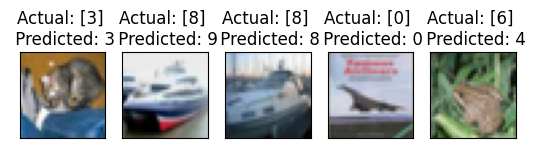

In [10]:
for image in range(5):
    print(f"Act: {y_test[image]} \n Pred: {predictedLabel[image]}")
    plt.subplot(1,5,image+1, title=f"Actual: {y_actuals[image]} \n Predicted: {predictedLabel[image]}")
    plt.imshow(x_test[image])
    plt.xticks([])
    plt.yticks([])
plt.show()

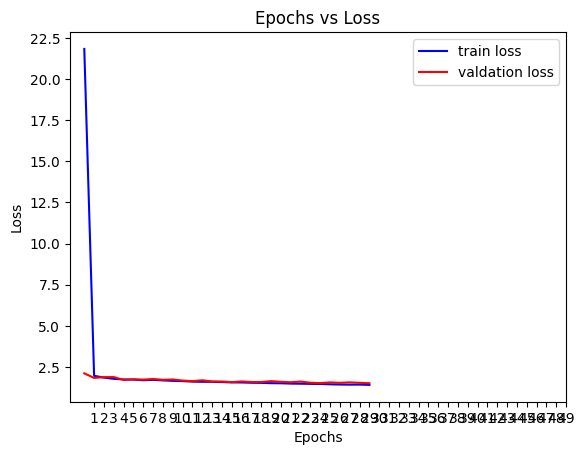

In [14]:
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xticks(np.arange(1,50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()



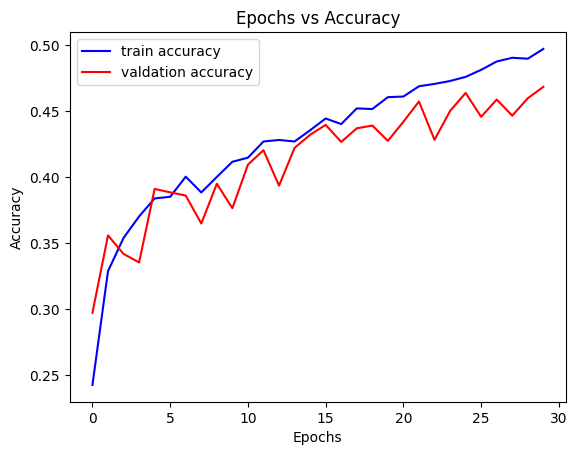

In [13]:
plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()